# Librerías

In [ ]:
!pip install tensorflow keras

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from keras.layers import Input, Dense, Dropout, Embedding, Flatten, Concatenate, BatchNormalization
from keras.models import Model

# conexión a la base de datos Mongo DB

In [ ]:
# Ruta del archivo JSON
ruta_archivo = '/content/L_matches.json'

# Leer el archivo JSON y convertirlo en un DataFrame
df = pd.read_json(ruta_archivo)

# Mostrar el DataFrame
print(df)


                            _id captain_player  cards_red_player  \
0      66e9eee6e0f59e7192fa4aaf          false                 0   
1      66e9eee6e0f59e7192fa4ab0          false                 0   
2      66e9eee6e0f59e7192fa4ab1          false                 0   
3      66e9eee6e0f59e7192fa4ab2          false                 0   
4      66e9eee6e0f59e7192fa4ab3          false                 0   
...                         ...            ...               ...   
87781  66e9ef21e0f59e7192fba2f9          false                 0   
87782  66e9ef21e0f59e7192fba2fa          false                 0   
87783  66e9ef21e0f59e7192fba2fb          false                 0   
87784  66e9ef21e0f59e7192fba2fc          false                 0   
87785  66e9ef21e0f59e7192fba2fd          false                 0   

       cards_yellow_player    city  coach_away        coach_home  \
0                        0    uanl  M. Almeyda  Ricardo Ferretti   
1                        0    uanl  M. Almeyda 

# Limpieza y transformación de datos

In [ ]:
# Suponiendo que tienes un DataFrame llamado "df"
print(df.isnull().sum())

In [ ]:
#cambiar NAN por 0
#df = df.fillna(0)

In [ ]:
# Reemplazar 'false' por 0 y 'true' por 1
#df['games_captain'] = df['games_captain'].replace({'false': 0, 'true': 1})

# Convertir el campo a entero
#df['games_captain'] = df['games_captain'].astype(int)

# Ver los valores únicos después de la conversión
#print(df['games_captain'].unique())


[0 1]


In [66]:
# Codificar variables categóricas en índices
referee = LabelEncoder()
status_short = LabelEncoder()
season = LabelEncoder()
round = LabelEncoder()
venue = LabelEncoder()
city = LabelEncoder()
team_home = LabelEncoder()
team_away = LabelEncoder()
lineup_home = LabelEncoder()
lineup_away = LabelEncoder()
coach_home = LabelEncoder()
coach_away = LabelEncoder()
position_player = LabelEncoder()
team_player = LabelEncoder()
player = LabelEncoder()
captain_player = LabelEncoder()
subtitute_player = LabelEncoder()


df['referee'] = referee.fit_transform(df['referee'])
df['status_short'] = status_short.fit_transform(df['status_short'])
df['season'] = season.fit_transform(df['season'])
df['round'] = round.fit_transform(df['round'])
df['venue'] = venue.fit_transform(df['venue'])
df['city'] = city.fit_transform(df['city'])
df['team_home'] = team_home.fit_transform(df['team_home'])
df['team_away'] = team_away.fit_transform(df['team_away'])
df['lineup_home'] = lineup_home.fit_transform(df['lineup_home'])
df['lineup_away'] = lineup_away.fit_transform(df['lineup_away'])
df['coach_home'] = coach_home.fit_transform(df['coach_home'])
df['coach_away'] = coach_away.fit_transform(df['coach_away'])
df['position_player'] = position_player.fit_transform(df['position_player'])
df['team_player'] = team_player.fit_transform(df['team_player'])
df['player'] = player.fit_transform(df['player'])
df['captain_player'] = captain_player.fit_transform(df['captain_player'])
df['subtitute_player'] = subtitute_player.fit_transform(df['subtitute_player'])

In [ ]:
# Imprimir los valores únicos y sus correspondientes índices numéricos
for i, label in enumerate(id_fixture.classes_):
    print(f"El valor '{label}' ahora es {i}")

In [ ]:
# Imprimir los nombres de las columnas
print(df.columns)

In [67]:
# Normalizar el valor numérico de los campos
scaler = MinMaxScaler()
df['winner_home'] = scaler.fit_transform(df[['winner_home']])
df['winner_away'] = scaler.fit_transform(df[['winner_away']])
df['goals_home'] = scaler.fit_transform(df[['goals_home']])
df['goals_away'] = scaler.fit_transform(df[['goals_away']])
df['minutes_player'] = scaler.fit_transform(df[['minutes_player']])
df['offsides_player'] = scaler.fit_transform(df[['offsides_player']])
df['shots_player'] = scaler.fit_transform(df[['shots_player']])
df['goals_player'] = scaler.fit_transform(df[['goals_player']])
df['goals_concedes_player'] = scaler.fit_transform(df[['goals_concedes_player']])
df['goals_assists_player'] = scaler.fit_transform(df[['goals_assists_player']])
df['goals_saves_player'] = scaler.fit_transform(df[['goals_saves_player']])
df['passes_total_player'] = scaler.fit_transform(df[['passes_total_player']])
df['passes_key_player'] = scaler.fit_transform(df[['passes_key_player']])
df['tackles_player'] = scaler.fit_transform(df[['tackles_player']])
df['duels_won_player'] = scaler.fit_transform(df[['duels_won_player']])
df['dribbles_success_player'] = scaler.fit_transform(df[['dribbles_success_player']])
df['fouls_drawn_player'] = scaler.fit_transform(df[['fouls_drawn_player']])
df['fouls_committed_player'] = scaler.fit_transform(df[['fouls_committed_player']])
df['cards_yellow_player'] = scaler.fit_transform(df[['cards_yellow_player']])
df['cards_red_player'] = scaler.fit_transform(df[['cards_red_player']])
df['penalty_won_player'] = scaler.fit_transform(df[['penalty_won_player']])



In [68]:
# Variables para el modelo
categorical_features = df[[
    'referee',
    'status_short',
    'season',
    'round',
    'venue',
    'city',
    'team_home',
    'team_away',
    'lineup_home',
    'lineup_away',
    'coach_home',
    'coach_away',
    'position_player',
    'team_player',
    'player',
    'captain_player',
    'subtitute_player'
]]

numerical_features = df[[
    'winner_home',
    'winner_away',
    'goals_home',
    'goals_away',
    'minutes_player',
    'offsides_player',
    'shots_player',
    'goals_player',
    'goals_concedes_player',
    'goals_assists_player',
    'goals_saves_player',
    'passes_total_player',
    'passes_key_player',
    'tackles_player',
    'duels_won_player',
    'dribbles_success_player',
    'fouls_drawn_player',
    'fouls_committed_player',
    'cards_yellow_player',
    'cards_red_player',
    'penalty_won_player'
]]

# Embedding

In [73]:
# Parámetros de embeddings
embedding_size = 1
num_team_home = len(df['team_home'].unique())
num_team_away = len(df['team_away'].unique())
num_referee = len(df['referee'].unique())
num_status_short = len(df['status_short'].unique())
num_season = len(df['season'].unique())
num_round = len(df['round'].unique())
num_venue = len(df['venue'].unique())
num_city = len(df['city'].unique())
num_lineup_home = len(df['lineup_home'].unique())
num_lineup_away = len(df['lineup_away'].unique())
num_coach_home = len(df['coach_home'].unique())
num_coach_away = len(df['coach_away'].unique())
num_position_player = len(df['position_player'].unique())
num_team_player = len(df['team_player'].unique())
num_player = len(df['player'].unique())
num_captain_player = len(df['captain_player'].unique())
num_subtitute_player = len(df['subtitute_player'].unique())

# Definir las entradas
input_team_home = Input(shape=(1,), name='team_home')
input_team_away = Input(shape=(1,), name='team_away')
input_referee = Input(shape=(1,), name='referee')
input_status_short = Input(shape=(1,), name='status_short')
input_season = Input(shape=(1,), name='season')
input_round = Input(shape=(1,), name='round')
input_venue = Input(shape=(1,), name='venue')
input_city = Input(shape=(1,), name='city')
input_lineup_home = Input(shape=(1,), name='lineup_home')
input_lineup_away = Input(shape=(1,), name='lineup_away')
input_coach_home = Input(shape=(1,), name='coach_home')
input_coach_away = Input(shape=(1,), name='coach_away')
input_position_player = Input(shape=(1,), name='position_player')
input_team_player = Input(shape=(1,), name='team_player')
input_player = Input(shape=(1,), name='player')
input_captain_player = Input(shape=(1,), name='captain_player')
input_subtitute_player = Input(shape=(1,), name='subtitute_player')
input_winner_home = Input(shape=(1,), name='winner_home')
input_winner_away = Input(shape=(1,), name='winner_away')
input_goals_home = Input(shape=(1,), name='goals_home')
input_goals_away = Input(shape=(1,), name='goals_away')
input_minutes_player = Input(shape=(1,), name='minutes_player')
input_offsides_player = Input(shape=(1,), name='offsides_player')
input_shots_player = Input(shape=(1,), name='shots_player')
input_goals_player = Input(shape=(1,), name='goals_player')
input_goals_concedes_player = Input(shape=(1,), name='goals_concedes_player')
input_goals_assists_player = Input(shape=(1,), name='goals_assists_player')
input_goals_saves_player = Input(shape=(1,), name='goals_saves_player')
input_passes_total_player = Input(shape=(1,), name='passes_total_player')
input_passes_key_player = Input(shape=(1,), name='passes_key_player')
input_tackles_player = Input(shape=(1,), name='tackles_player')
input_duels_won_player = Input(shape=(1,), name='duels_won_player')
input_dribbles_success_player = Input(shape=(1,), name='dribbles_success_player')
input_fouls_drawn_player = Input(shape=(1,), name='fouls_drawn_player')
input_fouls_committed_player = Input(shape=(1,), name='fouls_committed_player')
input_cards_yellow_player = Input(shape=(1,), name='cards_yellow_player')
input_cards_red_player = Input(shape=(1,), name='cards_red_player')
input_penalty_won_player = Input(shape=(1,), name='penalty_won_player')


# Definir las capas de embedding
embedding_team_home = Embedding(input_dim=num_team_home, output_dim=embedding_size)(input_team_home)
embedding_team_away = Embedding(input_dim=num_team_away, output_dim=embedding_size)(input_team_away)
embedding_referee = Embedding(input_dim=num_referee, output_dim=embedding_size)(input_referee)
embedding_status_short = Embedding(input_dim=num_status_short, output_dim=embedding_size)(input_status_short)
embedding_season = Embedding(input_dim=num_season, output_dim=embedding_size)(input_season)
embedding_round = Embedding(input_dim=num_round, output_dim=embedding_size)(input_round)
embedding_venue = Embedding(input_dim=num_venue, output_dim=embedding_size) (input_venue)
embedding_city = Embedding(input_dim=num_city, output_dim=embedding_size)(input_city)
embedding_lineup_home = Embedding(input_dim=num_lineup_home, output_dim=embedding_size) (input_lineup_home)
embedding_lineup_away = Embedding(input_dim=num_lineup_away, output_dim=embedding_size) (input_lineup_away)
embedding_coach_home = Embedding(input_dim=num_coach_home, output_dim=embedding_size) (input_coach_home)
embedding_coach_away = Embedding(input_dim=num_coach_away, output_dim=embedding_size) (input_coach_away)
embedding_position_player = Embedding(input_dim=num_position_player, output_dim=embedding_size) (input_position_player)
embedding_team_player = Embedding(input_dim=num_team_player, output_dim=embedding_size) (input_team_player)
embedding_player = Embedding(input_dim=num_player, output_dim=embedding_size) (input_player)
embedding_captain_player = Embedding(input_dim=num_captain_player, output_dim=embedding_size) (input_captain_player)
embedding_subtitute_player = Embedding(input_dim=num_subtitute_player, output_dim=embedding_size) (input_subtitute_player)

# Aplanar las salidas de embeddings
flatten_team_home = Flatten()(embedding_team_home)
flatten_team_away = Flatten()(embedding_team_away)
flatten_referee = Flatten()(embedding_referee)
flatten_status_short = Flatten()(embedding_status_short)
flatten_season = Flatten()(embedding_season)
flatten_round = Flatten()(embedding_round)
flatten_venue = Flatten()(embedding_venue)
flatten_city = Flatten()(embedding_city)
flatten_lineup_home = Flatten()(embedding_lineup_home)
flatten_lineup_away = Flatten()(embedding_lineup_away)
flatten_coach_home = Flatten()(embedding_coach_home)
flatten_coach_away = Flatten()(embedding_coach_away)
flatten_position_player = Flatten()(embedding_position_player)
flatten_team_player = Flatten()(embedding_team_player)
flatten_player = Flatten()(embedding_player)
flatten_captain_player = Flatten()(embedding_captain_player)
flatten_subtitute_player = Flatten()(embedding_subtitute_player)

# Concatenar todas las características
concat_features = Concatenate()([flatten_team_home, flatten_team_away, flatten_referee,
                                 flatten_status_short, flatten_season, flatten_round, flatten_venue, flatten_city,
                                 flatten_lineup_home, flatten_lineup_away, flatten_coach_home, flatten_coach_away,
                                 flatten_position_player, flatten_team_player, flatten_player, flatten_captain_player,
                                 flatten_subtitute_player,input_winner_home, input_winner_away, input_goals_home, input_goals_away,
                                 input_minutes_player, input_offsides_player, input_shots_player, input_goals_player,
                                 input_goals_concedes_player, input_goals_assists_player, input_goals_saves_player,
                                 input_passes_total_player, input_passes_key_player, input_tackles_player, input_duels_won_player,
                                 input_dribbles_success_player,input_fouls_drawn_player, input_fouls_committed_player,
                                 input_cards_yellow_player, input_cards_red_player,input_penalty_won_player ])

# Capas densas
dense_1 = Dense(32, activation='relu')(concat_features)
batch_norm_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.3)(batch_norm_1)
dense_2 = Dense(16, activation='relu')(dropout_1)
batch_norm_2 = BatchNormalization()(dense_2)
dropout_2 = Dropout(0.3)(batch_norm_2)
dense_3 = Dense(8, activation='relu')(dropout_2)
batch_norm_3 = BatchNormalization()(dense_3)
dropout_3 = Dropout(0.3)(batch_norm_3)


# Capa de salida
output = Dense(1, activation='linear')(dropout_2)

# Crear el modelo
model = Model(inputs=[ input_team_home, input_team_away, input_referee, input_status_short, input_season,
    input_round, input_venue, input_city, input_lineup_home, input_lineup_away, input_coach_home,
    input_coach_away, input_position_player, input_team_player, input_player, input_captain_player,
    input_subtitute_player, input_winner_home, input_winner_away, input_goals_home, input_goals_away,
    input_minutes_player, input_offsides_player, input_shots_player, input_goals_player,
    input_goals_concedes_player, input_goals_assists_player, input_goals_saves_player,
    input_passes_total_player, input_passes_key_player, input_tackles_player, input_duels_won_player,
    input_dribbles_success_player, input_fouls_drawn_player, input_fouls_committed_player,
    input_cards_yellow_player, input_cards_red_player, input_penalty_won_player], outputs=output)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])





In [ ]:
# Suponiendo que tienes un DataFrame llamado 'df'
print(df.dtypes)

# Modelo

In [74]:
# X_train debería coincidir con los inputs que definiste en el modelo.
X_train = [df['team_home'].values, df['team_away'].values, df['referee'].values,
           df['status_short'].values, df['season'].values, df['round'].values, df['venue'].values,
           df['city'].values, df['lineup_home'].values, df['lineup_away'].values, df['coach_home'].values,
           df['coach_away'].values, df['position_player'].values, df['team_player'].values, df['player'].values, df['captain_player'].values,
           df['subtitute_player'].values,  df['winner_home'].values, df['winner_away'].values, df['goals_home'].values,
           df['goals_away'].values, df['minutes_player'].values, df['offsides_player'].values,
           df['shots_player'].values, df['goals_player'].values, df['goals_concedes_player'].values,
           df['goals_assists_player'].values, df['goals_saves_player'].values, df['passes_total_player'].values, df['passes_key_player'].values,
           df['tackles_player'].values, df['duels_won_player'].values, df['dribbles_success_player'].values, df['fouls_drawn_player'].values,
           df['fouls_committed_player'].values, df['cards_yellow_player'].values, df['cards_red_player'].values, df['penalty_won_player'].values]

# La variable y_train debe contener tus etiquetas verdaderas (no valores aleatorios).
#y_train = df['valor_real'].values  # Reemplaza 'valor_real' por tu variable objetivo.
y_train = np.random.rand(len(df))  # Valores aleatorios como ejemplo; reemplaza con tus valores



In [78]:
print(f"num_team_home: {num_team_home}")
print(f"num_team_away: {num_team_away}")
print(f"num_referee: {num_referee}")
print(f"num_status_short: {num_status_short}")
print(f"num_season: {num_season}")
print(f"num_round: {num_round}")
print(f"num_venue: {num_venue}")
print(f"num_city: {num_city}")
print(f"num_lineup_home: {num_lineup_home}")
print(f"num_lineup_away: {num_lineup_away}")
print(f"num_coach_home: {num_coach_home}")
print(f"num_coach_away: {num_coach_away}")


num_team_home: 23
num_team_away: 23
num_referee: 80
num_status_short: 3
num_season: 9
num_round: 48
num_venue: 81
num_city: 25
num_lineup_home: 22
num_lineup_away: 21
num_coach_home: 119
num_coach_away: 120


In [ ]:
print(df[['id_fixture', 'team_home', 'team_away', 'referee', 'status_short', 'season',
         'round', 'venue', 'city', 'lineup_home', 'lineup_away', 'coach_home', 'coach_away']].max())


In [ ]:
df['id_fixture'].unique()

In [ ]:
# Verificar IDs que no están en el rango de valores únicos
missing_ids = set(df['id_fixture']) - set(range(len(df['id_fixture'].unique())))
print(f"IDs faltantes o repetidos: {missing_ids}")

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear una instancia de EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Métrica a monitorizar
    patience=10,          # Esperar 5 épocas sin mejora
    restore_best_weights=True  # Restaurar los mejores pesos
)

# Entrenar el modelo con EarlyStopping
history = model.fit(
    X_train, y_train,
    epochs=400,
    batch_size=150,
    validation_split=0.2,  # Usar el 20% de los datos para validación
    callbacks=[early_stopping]  # Pasar el callback
)

Epoch 1/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 1.2638 - mean_absolute_error: 0.8204 - val_loss: 0.0911 - val_mean_absolute_error: 0.2575
Epoch 2/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1932 - mean_absolute_error: 0.3490 - val_loss: 0.0840 - val_mean_absolute_error: 0.2505
Epoch 3/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.1055 - mean_absolute_error: 0.2717 - val_loss: 0.0832 - val_mean_absolute_error: 0.2497
Epoch 4/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0883 - mean_absolute_error: 0.2551 - val_loss: 0.0829 - val_mean_absolute_error: 0.2493
Epoch 5/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0833 - mean_absolute_error: 0.2493 - val_loss: 0.0829 - val_mean_absolute_error: 0.2493
Epoch 6/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0834 - mean_absolute_error: 0.2502 - val_loss: 0.0829 - val_mean_absolute_error: 0.2494
Epoch 7/400
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0831 - mean_absolute_error

In [ ]:
import matplotlib.pyplot as plt

# Para que los gráficos se muestren dentro del notebook de Colab
%matplotlib inline

plt.xlabel("#capa")
plt.ylabel("Magnitud pérdida ")
plt.plot(history.history["loss"])
plt.show()


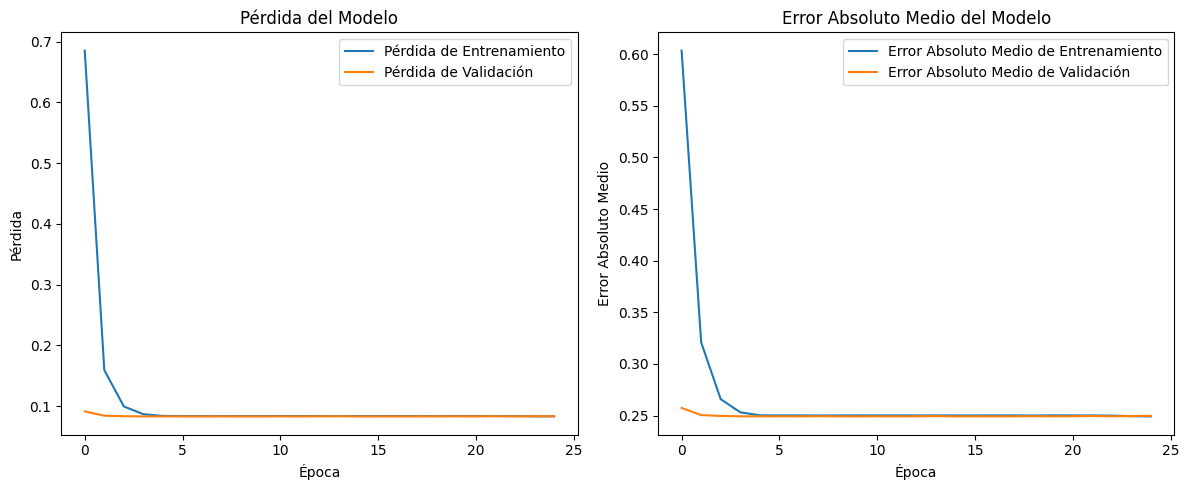

In [76]:
import matplotlib.pyplot as plt

# Obtener los valores de pérdida y error absoluto medio
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

# Graficar pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss, label='Pérdida de Entrenamiento')
plt.plot(val_loss, label='Pérdida de Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Graficar Error Absoluto Medio
plt.subplot(1, 2, 2)
plt.plot(mae, label='Error Absoluto Medio de Entrenamiento')
plt.plot(val_mae, label='Error Absoluto Medio de Validación')
plt.title('Error Absoluto Medio del Modelo')
plt.xlabel('Época')
plt.ylabel('Error Absoluto Medio')
plt.legend()

plt.tight_layout()
plt.show()


# Capas y resultados del embedding

In [ ]:
# Obtener las capas de embedding
embedding_layers = [layer for layer in model.layers if isinstance(layer, tf.keras.layers.Embedding)]

for i, layer in enumerate(embedding_layers):
    print(f"Embedding layer {i} weights:")
    print(layer.get_weights()[0])


In [86]:
import numpy as np
import pandas as pd

# Supongamos que ya tienes los embeddings y los índices obtenidos de tu modelo
# Estos son solo ejemplos; usa los valores reales obtenidos de tu modelo

# Ejemplo de *embeddings* obtenidos para las variables categóricas
embedding_layer_team_home = embedding_layers[1].get_weights()[0]
embedding_layer_team_away = embedding_layers[2].get_weights()[0]
embedding_layer_referee = embedding_layers[3].get_weights()[0]
embedding_layer_status_short = embedding_layers[4].get_weights()[0]
embedding_layer_season = embedding_layers[5].get_weights()[0]
embedding_layer_round = embedding_layers[6].get_weights()[0]
embedding_layer_venue = embedding_layers[7].get_weights()[0]
embedding_layer_city = embedding_layers[8].get_weights()[0]
embedding_layer_lineup_home = embedding_layers[9].get_weights()[0]
embedding_layer_lineup_away = embedding_layers[10].get_weights()[0]
embedding_layer_coach_home = embedding_layers[11].get_weights()[0]
embedding_layer_coach_away = embedding_layers[12].get_weights()[0]
embedding_layer_position_player = embedding_layers[13].get_weights()[0]
embedding_layer_team_player = embedding_layers[14].get_weights()[0]
embedding_layer_player = embedding_layers[15].get_weights()[0]
embedding_layer_captain_player = embedding_layers[16].get_weights()[0]
embedding_layer_subtitute_player = embedding_layers[17].get_weights()[0]

# Función para obtener embeddings de cada jugador, incluyendo variables numéricas
def get_fixture_embeddings(df,  embedding_layer_team_home, embedding_layer_team_away,
                          embedding_layer_referee, embedding_layer_status_short, embedding_layer_season,
                          embedding_layer_round, embedding_layer_venue, embedding_layer_city,
                          embedding_layer_lineup_home, embedding_layer_lineup_away,
                          embedding_layer_coach_home, embedding_layer_coach_away, embedding_position_player,
                          embedding_team_player, embedding_player, embedding_captain_player, embedding_subtitute_player ):
    embeddings = []

    for _, row in df.iterrows():
        # Obtener los embeddings de las variables categóricas
        team_home_embedding = embedding_layer_team_home[row['team_home']]
        team_away_embedding = embedding_layer_team_away[row['team_away']]
        referee_embedding = embedding_layer_referee[row['referee']]
        status_short_embedding = embedding_layer_status_short[row['status_short']]
        season_embedding = embedding_layer_season[row['season']]
        round_embedding = embedding_layer_round[row['round']]
        venue_embedding = embedding_layer_venue[row['venue']]
        city_embedding = embedding_layer_city[row['city']]
        lineup_home_embedding = embedding_layer_lineup_home[row['lineup_home']]
        lineup_away_embedding = embedding_layer_lineup_away[row['lineup_away']]
        coach_home_embedding = embedding_layer_coach_home[row['coach_home']]
        coach_away_embedding = embedding_layer_coach_away[row['coach_away']]
        position_player_embedding = embedding_position_player[row['position_player']]
        team_player_embedding = embedding_team_player[row['team_player']]
        player_embedding = embedding_player[row['player']]
        captain_player_embedding = embedding_captain_player[row['captain_player']]
        subtitute_player_embedding = embedding_subtitute_player[row['subtitute_player']]

        # Combinar todos los embeddings categóricos
        categorical_embedding = np.concatenate([ team_home_embedding, team_away_embedding,
                                                referee_embedding, status_short_embedding, season_embedding,
                                                round_embedding, venue_embedding, city_embedding, lineup_home_embedding,
                                                lineup_away_embedding, coach_home_embedding, coach_away_embedding, position_player_embedding,
                                                team_player_embedding, player_embedding, captain_player_embedding, subtitute_player_embedding  ])
        # Añadir las características numéricas sin embeddings
        numerical_features = row[['winner_home',
    'winner_away',
    'goals_home',
    'goals_away',
    'minutes_player',
    'offsides_player',
    'shots_player',
    'goals_player',
    'goals_concedes_player',
    'goals_assists_player',
    'goals_saves_player',
    'passes_total_player',
    'passes_key_player',
    'tackles_player',
    'duels_won_player',
    'dribbles_success_player',
    'fouls_drawn_player',
    'fouls_committed_player',
    'cards_yellow_player',
    'cards_red_player',
    'penalty_won_player' ]].values

        # Combinar embeddings categóricos y características numéricas
        combined_embedding = np.concatenate([categorical_embedding, numerical_features])
        embeddings.append(combined_embedding)

    return np.array(embeddings)

# Obtener embeddings para todos los jugadores

fixture_embeddings = get_fixture_embeddings(df, embedding_layer_team_home,
                                          embedding_layer_team_away, embedding_layer_referee, embedding_layer_status_short,
                                          embedding_layer_season, embedding_layer_round, embedding_layer_venue,
                                          embedding_layer_city, embedding_layer_lineup_home, embedding_layer_lineup_away,
                                          embedding_layer_coach_home, embedding_layer_coach_away, embedding_layer_position_player,
                                          embedding_layer_team_player, embedding_layer_player, embedding_layer_captain_player,
                                          embedding_layer_subtitute_player )


# Imprimir los resultados
#fixture_df = pd.DataFrame(fixture_embeddings, columns=[f'feature_{i}' for i in range(fixture_embeddings.shape[1])])
#print(fixture_df)




In [88]:
# Definir los nombres de las columnas basados en las variables categóricas y numéricas
categorical_columns = ['team_home', 'team_away', 'referee', 'status_short', 'season', 'round', 'venue', 'city',
                      'lineup_home', 'lineup_away', 'coach_home', 'coach_away', 'position_player', 'team_player',
                      'player', 'captain_player', 'subtitute_player']

# Determinar cuántas dimensiones tiene cada embedding
embedding_dims = embedding_layer_team_home.shape[1]  # Suponiendo que todos los embeddings tienen la misma dimensión

# Crear nombres de columnas para los embeddings categóricos
categorical_embedding_columns = [f'{col}_embedding_{i}' for col in categorical_columns for i in range(embedding_dims)]

# Nombres de las columnas de las características numéricas
numerical_columns = ['winner_home', 'winner_away', 'goals_home', 'goals_away', 'minutes_player',
                     'offsides_player', 'shots_player', 'goals_player', 'goals_concedes_player',
                     'goals_assists_player', 'goals_saves_player', 'passes_total_player', 'passes_key_player',
                     'tackles_player', 'duels_won_player', 'dribbles_success_player', 'fouls_drawn_player',
                     'fouls_committed_player', 'cards_yellow_player', 'cards_red_player', 'penalty_won_player']

# Combinar todas las columnas
all_columns = categorical_embedding_columns + numerical_columns

# Crear un DataFrame con los embeddings y los nombres de columnas adecuados
fixture_df = pd.DataFrame(fixture_embeddings, columns=all_columns)

# Imprimir los resultados
print(fixture_df)

      team_home_embedding_0 team_away_embedding_0 referee_embedding_0  \
0                 -0.012366             -0.009446           -0.010089   
1                 -0.012366             -0.009446           -0.010089   
2                 -0.012366             -0.009446           -0.010089   
3                 -0.012366             -0.009446           -0.010089   
4                 -0.012366             -0.009446           -0.010089   
...                     ...                   ...                 ...   
87781             -0.050586             -0.019476            0.012306   
87782             -0.050586             -0.019476            0.012306   
87783             -0.050586             -0.019476            0.012306   
87784             -0.050586             -0.019476            0.012306   
87785             -0.050586             -0.019476            0.012306   

      status_short_embedding_0 season_embedding_0 round_embedding_0  \
0                    -0.014318           0.024252   

In [87]:
# Obtener la forma (shape) de cada capa de embedding
print("Dimensiones del embedding de 'team_home':", embedding_layer_team_home.shape[1])
print("Dimensiones del embedding de 'team_away':", embedding_layer_team_away.shape[1])
print("Dimensiones del embedding de 'referee':", embedding_layer_referee.shape[1])
print("Dimensiones del embedding de 'status_short':", embedding_layer_status_short.shape[1])
print("Dimensiones del embedding de 'season':", embedding_layer_season.shape[1])
print("Dimensiones del embedding de 'round':", embedding_layer_round.shape[1])
print("Dimensiones del embedding de 'venue':", embedding_layer_venue.shape[1])
print("Dimensiones del embedding de 'city':", embedding_layer_city.shape[1])
print("Dimensiones del embedding de 'lineup_home':", embedding_layer_lineup_home.shape[1])
print("Dimensiones del embedding de 'lineup_away':", embedding_layer_lineup_away.shape[1])
print("Dimensiones del embedding de 'coach_home':", embedding_layer_coach_home.shape[1])
print("Dimensiones del embedding de 'coach_away':", embedding_layer_coach_away.shape[1])
print("Dimensiones del embedding de 'position_player':", embedding_layer_position_player.shape[1])
print("Dimensiones del embedding de 'team_player':", embedding_layer_team_player.shape[1])
print("Dimensiones del embedding de 'player':", embedding_layer_player.shape[1])
print("Dimensiones del embedding de 'captain_player':", embedding_layer_captain_player.shape[1])
print("Dimensiones del embedding de 'substitute_player':", embedding_layer_subtitute_player.shape[1])


Dimensiones del embedding de 'team_home': 1
Dimensiones del embedding de 'team_away': 1
Dimensiones del embedding de 'referee': 1
Dimensiones del embedding de 'status_short': 1
Dimensiones del embedding de 'season': 1
Dimensiones del embedding de 'round': 1
Dimensiones del embedding de 'venue': 1
Dimensiones del embedding de 'city': 1
Dimensiones del embedding de 'lineup_home': 1
Dimensiones del embedding de 'lineup_away': 1
Dimensiones del embedding de 'coach_home': 1
Dimensiones del embedding de 'coach_away': 1
Dimensiones del embedding de 'position_player': 1
Dimensiones del embedding de 'team_player': 1
Dimensiones del embedding de 'player': 1
Dimensiones del embedding de 'captain_player': 1
Dimensiones del embedding de 'substitute_player': 1


**¿Qué característica corresponde a que feature?**

In [ ]:
# Función para obtener el tamaño del embedding
def get_embedding_size(embedding_layer):
    return embedding_layer.get_weights()[0].shape[1]

# Obtener tamaños de embeddings
embedding_sizes = [get_embedding_size(layer) for layer in embedding_layers]

# Función para obtener etiquetas de características
def get_feature_labels(embedding_sizes, embedding_columns, num_features):
    feature_labels = []
    idx = 0

    # Etiquetas para embeddings categóricos
    for size, column_prefix in zip(embedding_sizes, embedding_columns):
        for j in range(size):
            feature_labels.append(f"{column_prefix}{j} - {column_prefix[:-1]}")
            idx += 1

    # Etiquetas para características numéricas
    for feature in num_features:
        feature_labels.append(f"{feature} - Numerical Feature")
        idx += 1

    return feature_labels

# Etiquetas de características
embedding_columns = [

    'referee',
    'status_short',
    'season',
    'round',
    'venue',
    'city',
    'team_home',
    'team_away',
    'lineup_home',
    'lineup_away',
    'coach_home',
    'coach_away',
    'position_player',
    'team_player',
    'player',
    'captain_player',
    'subtitute_player'
]
num_features = ['winner_home',
    'winner_away',
    'goals_home',
    'goals_away',
    'minutes_player',
    'offsides_player',
    'shots_player',
    'goals_player',
    'goals_concedes_player',
    'goals_assists_player',
    'goals_saves_player',
    'passes_total_player',
    'passes_key_player',
    'tackles_player',
    'duels_won_player',
    'dribbles_success_player',
    'fouls_drawn_player',
    'fouls_committed_player',
    'cards_yellow_player',
    'cards_red_player',
    'penalty_won_player']

feature_labels = get_feature_labels(embedding_sizes, embedding_columns, num_features)

# Mostrar las etiquetas correspondientes a las columnas del DataFrame
print("\nEtiquetas de características:")
for i, col in enumerate(fixture_df.columns):
    print(f"{col}: {feature_labels[i]}")

In [ ]:
# Guardar los embeddings en un archivo .npy
np.save('fixture_embeddings.npy', fixture_embeddings)


In [89]:
import numpy as np
import json
# Convertir el DataFrame a una lista de diccionarios
matches_list = fixture_df.to_dict(orient='records')
# Guardar la lista en un archivo JSON
with open('matches_embeddings.json', 'w') as json_file:
    json.dump(matches_list, json_file)